<a href="https://colab.research.google.com/github/Harshra1-ultra/CNN/blob/main/CNN_api(_y_network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Convolutional Neural Network (CNN) on MNIST cnn-mnist-1.4.1.py using the Functional API as shown in the following listing:**

In [2]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical ,plot_model


**Load MNIST data**

In [5]:
# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255




Using functional Api to build model

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0   

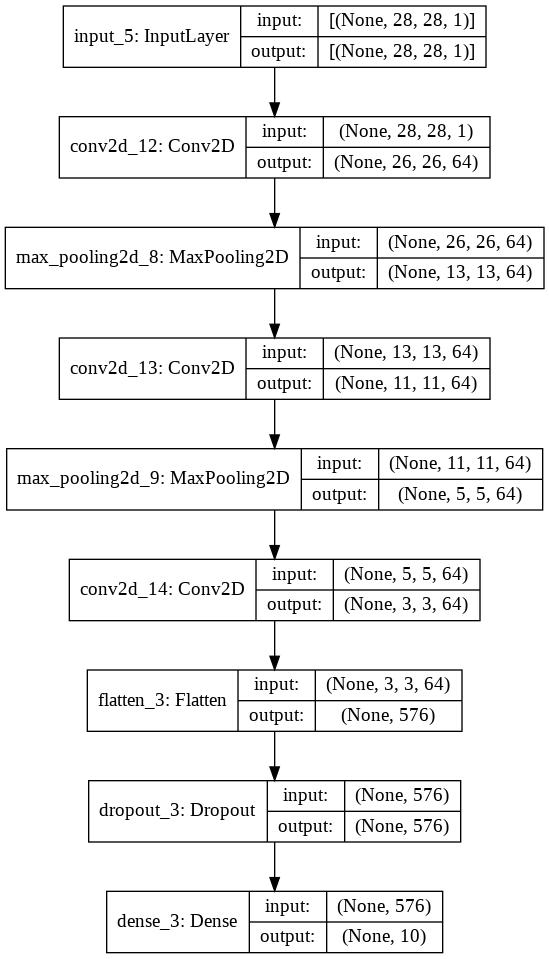

In [10]:
# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)
# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)
# network model in text
model.summary()
plot_model(model , to_file='Api_cnn.png' ,show_shapes=True )

In [12]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the model with input images and labels
model.fit(x_train,
             y_train,
             validation_data=(x_test, y_test),
             epochs=20,
             batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 55s 116ms/step - loss: 0.2780 - accuracy: 0.9142 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 2/20
469/469 [==============================] - 54s 116ms/step - loss: 0.0728 - accuracy: 0.9772 - val_loss: 0.0372 - val_accuracy: 0.9874
Epoch 3/20
469/469 [==============================] - 54s 116ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 4/20
469/469 [==============================] - 54s 115ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 5/20
469/469 [==============================] - 54s 115ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0255 - val_accuracy: 0.9913
Epoch 6/20
469/469 [==============================] - 54s 115ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0237 - val_accuracy: 0.9915
Epoch 7/20
469/469 [==============================] - 54s 115ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0249 - val_ac

In [14]:
# model accuracy on test dataset
score = model.evaluate(x_test,
                          y_test,
                          batch_size=batch_size,
                          verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))



Test accuracy: 99.4%


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 28, 28, 32)   320         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 28, 28, 32)   320         input_12[0][0]                   
____________________________________________________________________________________________

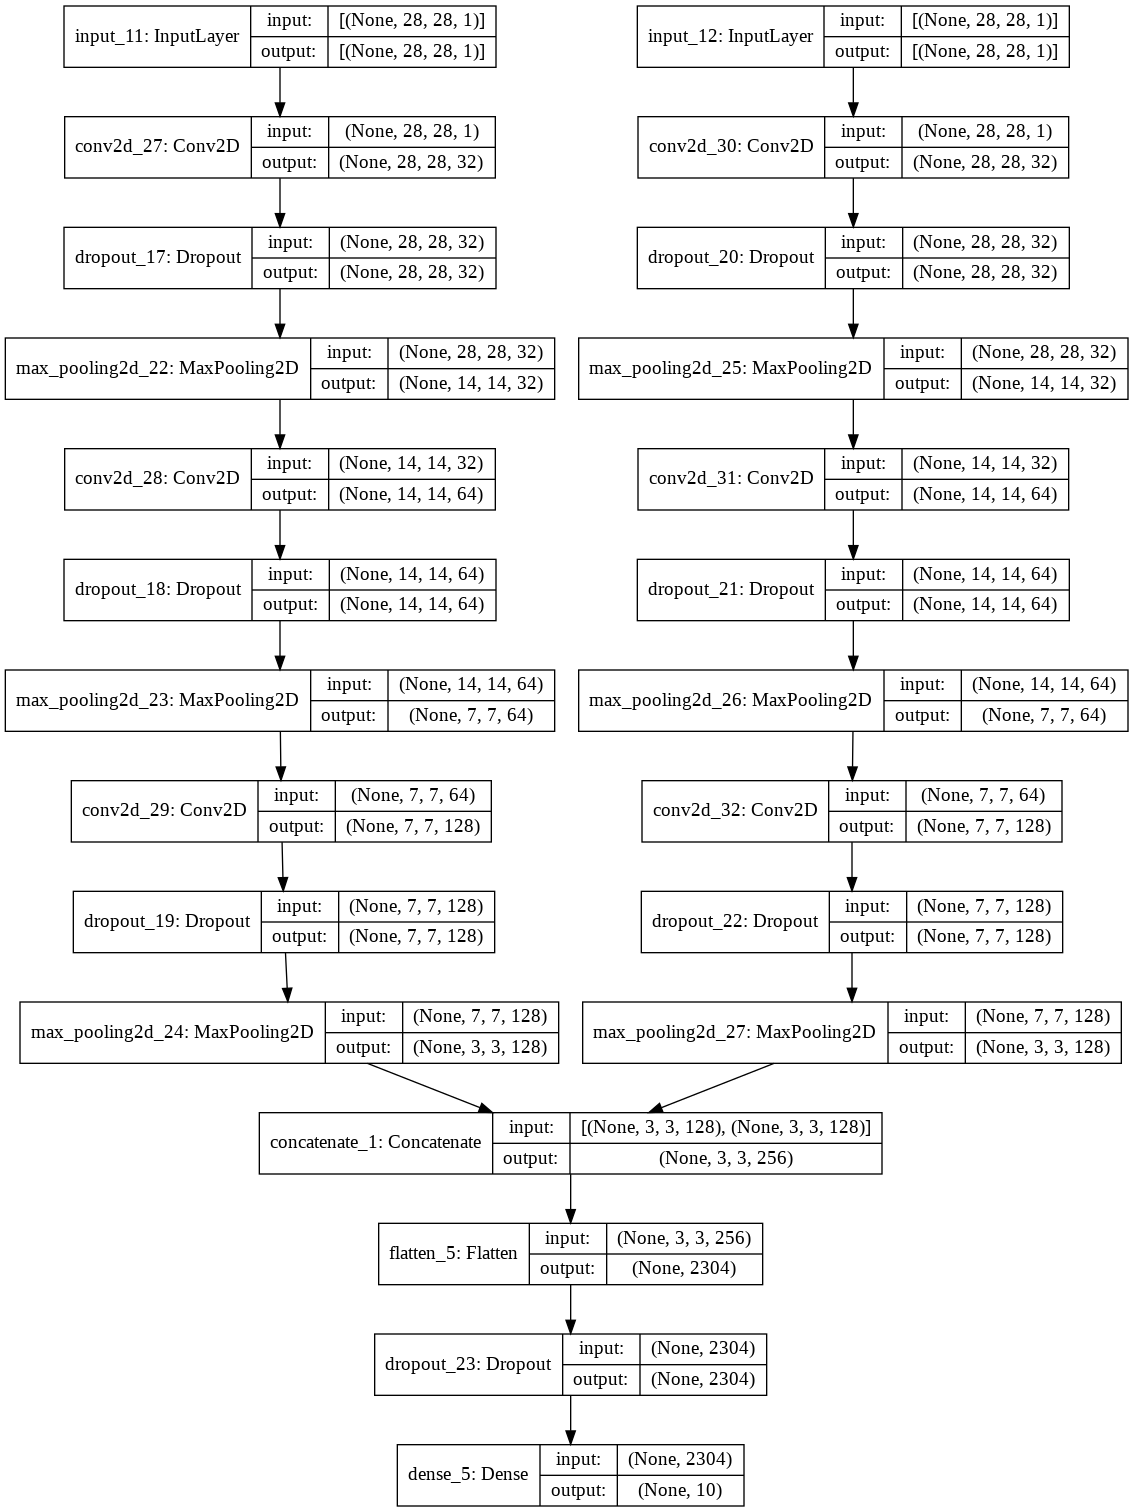

In [19]:
from tensorflow.keras.layers import Flatten, concatenate
# left branch of Y network
left_inputs = Input(shape=input_shape)
x = left_inputs
n_filters = 32
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2D
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    x = Conv2D(filters=filters,
                  kernel_size=kernel_size,
                  padding='same',
                  activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2
# right branch of Y network
right_inputs = Input(shape=input_shape)
y = right_inputs
filters = n_filters
# 3 layers of Conv2D-Dropout-MaxPooling2Do
# number of filters doubles after each layer (32-64-128)
for i in range(3):
    y = Conv2D(filters=filters,
                  kernel_size=kernel_size,
                  padding='same',activation='relu',
                  dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2
# merge left and right branches outputs
y = concatenate([x, y])
# feature maps to vector before connecting to Dense
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)
# build the model in functional API
model = Model([left_inputs, right_inputs], outputs)

# verify the model using layer text description
model.summary()
# verify the model using graph
plot_model(model, to_file='cnn-y-network.png', show_shapes=True)

In [21]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
   # train the model with input images and labels
model.fit([x_train, x_train],
             y_train,
             validation_data=([x_test, x_test], y_test),
             epochs=5,
             batch_size=batch_size)


Epoch 1/5
469/469 [==============================] - 178s 378ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0467 - val_accuracy: 0.9920
Epoch 2/5
469/469 [==============================] - 177s 378ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0351 - val_accuracy: 0.9927
Epoch 3/5
469/469 [==============================] - 177s 376ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0340 - val_accuracy: 0.9926
Epoch 4/5
469/469 [==============================] - 176s 375ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0289 - val_accuracy: 0.9933
Epoch 5/5
469/469 [==============================] - 176s 376ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0266 - val_accuracy: 0.9923


In [22]:
 # model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                          y_test,
                          batch_size=batch_size,
                          verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.2%
